# Classification: Penguins
Solve a classification problem: predict the species of a penguin by their beak.

In [2]:
import random

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load a prepared dataset

In [3]:
df = sns.load_dataset("penguins") 
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Data Exploration

<Axes: >

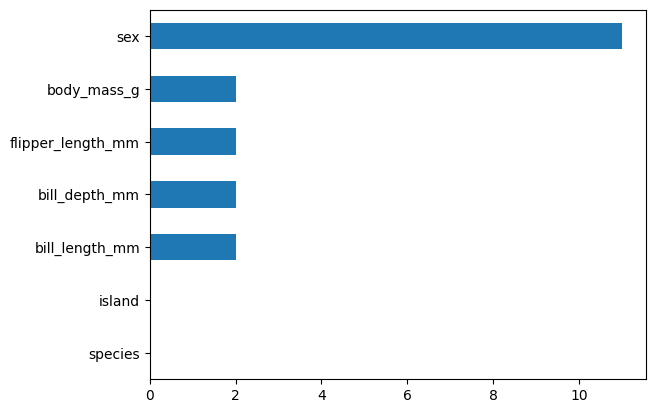

In [4]:
# count missing values
df.isna().sum().plot.barh()

In [5]:
df = df.dropna()
df.shape

(333, 7)

<Axes: xlabel='species'>

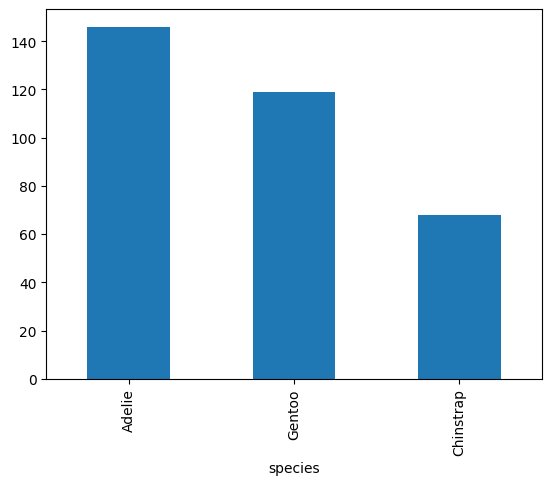

In [6]:
df["species"].value_counts().plot.bar()

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

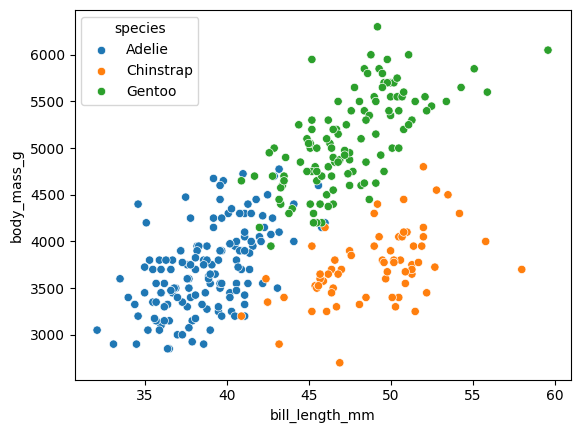

In [7]:
sns.scatterplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species")

### Train / Test split

In [8]:
from sklearn.model_selection import train_test_split

df_trainval, df_test = train_test_split(df, test_size=0.2, random_state=777)
df_train, df_val = train_test_split(df_trainval, test_size=0.25)

In [9]:
df_train.shape, df_val.shape, df_test.shape  # column number must be the same!

((199, 7), (67, 7), (67, 7))

## Identify X and y

In [10]:
# separate the target variable y (dependent variable): the thing we want to predict
y_train = df_train["species"]
y_val = df_val["species"]
y_test = df_test["species"]

In [11]:
# separate the predictor features X (independent variables): the things we use for predicting
columns = ['bill_length_mm', 'body_mass_g']
X_train = df_train[columns]
X_val = df_val[columns]
X_test = df_test[columns]

In [12]:
# normalize to values from 0 to 1
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
Xsc_train = scaler.fit_transform(X_train) # FIT ONCE!!!
Xsc_val = scaler.transform(X_val)
Xsc_test = scaler.transform(X_test)

## The Model: a Support Vector Machine

In [13]:
from sklearn.svm import SVC

In [23]:
m = SVC(kernel="linear", C=1.0)           # 1. initialize the model (set hyperparameters)
m.fit(Xsc_train, y_train)                 # 2. fit the model with training data (NEVER validation or test data!)

# now we can make predictions
y_pred = m.predict(Xsc_train)
y_pred_val = m.predict(Xsc_val)
y_pred_test = m.predict(Xsc_test)

In [24]:
# accuracy: % of correct  predictions
from sklearn.metrics import accuracy_score

round(accuracy_score(y_train, y_pred), 3)

0.925

In [25]:
round(accuracy_score(y_val, y_pred_val), 3)

0.955